In [1]:
setwd("/import/home/share/zw/pql")
getwd()

set.seed(20231124)

library(RhpcBLASctl)
max_cores <- 36
blas_set_num_threads(max_cores)

library(doParallel)
library(foreach)

# library(SPARK)
library(Matrix)
# library(Seurat)

library(ggplot2)
library(qqplotr)

library(spacexr)
library(nicheDE)

[1] "/import/home/share/zw/pql"

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”

Attaching package: ‘qqplotr’


The following objects are masked from ‘package:ggplot2’:

    stat_qq_line, StatQqLine




In [2]:
source("/import/home/share/zw/pql/code/mcube/mcubeClass.R")
source("/import/home/share/zw/pql/code/mcube/mcubeFitNull.R")
source("/import/home/share/zw/pql/code/mcube/mcubeScoreTest.R")
source("/import/home/share/zw/pql/code/mcube/mcubeUtils.R")
source("/import/home/share/zw/pql/code/mcube/mcubeKernel.R")

In [3]:
DATA_PATH <- "/import/home/share/zw/pql/data/breast_cancer"
RESULT_PATH <- "/import/home/share/zw/pql/results/breast_cancer"

if (!dir.exists(DATA_PATH)) {
    dir.create(DATA_PATH)
}
if (!dir.exists(RESULT_PATH)) {
    dir.create(RESULT_PATH)
}

In [4]:
seg_method <- "UCS_10X"
myRCTD <- readRDS(file.path(RESULT_PATH, seg_method, "myRCTD.rds"))

## NicheDE

In [6]:
# read in data
# create library matrix
librarymatrix <- CreateLibraryMatrix(
    t(myRCTD@reference@counts),
    cbind(
        colnames(myRCTD@reference@counts),
        as.character(myRCTD@reference@cell_types)
    )
)

[1] "Computing average expression profile matrix"
[1] "Too many cell of type Stromal downsampling to 1000."
[1] "Too many cell of type Macrophages 1 downsampling to 1000."
[1] "Too many cell of type Myoepi ACTA2+ downsampling to 1000."
[1] "Too many cell of type CD4+ T Cells downsampling to 1000."
[1] "Too many cell of type DCIS 1 downsampling to 1000."
[1] "Too many cell of type Prolif Invasive Tumor downsampling to 1000."
[1] "Too many cell of type Invasive Tumor downsampling to 1000."
[1] "Too many cell of type CD8+ T Cells downsampling to 1000."
[1] "Too many cell of type Endothelial downsampling to 1000."
[1] "Too many cell of type DCIS 2 downsampling to 1000."
[1] "Too many cell of type B Cells downsampling to 1000."
[1] "Average expression matrix computed"


In [7]:
weights_RCTD <- t(sapply(myRCTD@results, function(x) x$all_weights))
rownames(weights_RCTD) <- colnames(myRCTD@spatialRNA@counts)
NDE_obj <- CreateNicheDEObject(
    t(myRCTD@spatialRNA@counts), myRCTD@spatialRNA@coords,
    librarymatrix, weights_RCTD / rowSums(weights_RCTD),
    sigma = c(1, 200, 250)
)

[1] "Creating Niche-DE object"
[1] "Niche-DE object created with 8593 observations, 286 genes, 1 batch(es), and 17 cell types."


In [8]:
NDE_obj <- CalculateEffectiveNiche(NDE_obj)

[1] "Calculating effective niche for kernel bandwith 1(1 out of 3 values)."
[1] "Calculating effective niche for kernel bandwith 200(2 out of 3 values)."
[1] "Calculating effective niche for kernel bandwith 250(3 out of 3 values)."
[1] "Effective niche calculated"


In [9]:
NDE_obj <- niche_DE(NDE_obj, num_cores = 36, outfile = "")

[1] "Starting Niche-DE analysis with parameters C = 150, M = 10, gamma = 0.8."
[1] "Performing Niche-DE analysis with kernel bandwidth:1 (number 1 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Performing Niche-DE analysis with kernel bandwidth:200 (number 2 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Performing Niche-DE analysis with kernel bandwidth:250 (number 3 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Computing Positive Niche-DE Pvalues"
[1] "Computing Gene Level Pvalues"
[1] "Combining Gene Level Pvalues Across Kernel Bandwidths"
[1] "Computing Cell Type Level Pvalues"
[1] "Combining Cell Type  Level Pvalues Across Kernel Bandwidths"
[1] "Computing and Combining interaction Level Pvalues Across Kernel bandwidths"
[1] "Computing Negative Niche-DE Pvalues"
[1] "Computing Gene Level Pvalues"
[1] "Combining Gene Level Pvalues Across Kernel Bandwidths"
[1] "Computing Cell Type Level Pvalues"
[1] "Combining Cell Type  Level Pvalues Across Kernel Bandwidths"
[1] "Computing and Combining interaction Level Pvalues Across Kernel bandwidths"
[1] "Niche-DE analysis complete. Number of Genes with niche-DE T-stat equal to 215"


Warning message in niche_DE(NDE_obj, num_cores = 36, outfile = ""):
“Less than 1000 genes pass. This could be due to insufficient read depth of data or size of C parameter. Consider changing choice of C parameter”


In [ ]:
saveRDS(
    object = NDE_obj,
    file = file.path(
        RESULT_PATH, seg_method,
        paste0(
            "NDE_obj",
            ".rds"
        )
    )
)

In [6]:
get_niche_DE_genes(NDE_obj, 'I', index='DCIS 1', niche = 'Invasive Tumor', pos = TRUE, alpha = 0.05)

[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
1,CEACAM6,2.937126e-06


In [8]:
get_niche_DE_genes(NDE_obj, 'I', index='DCIS 2', niche = 'Invasive Tumor', pos = TRUE, alpha = 0.05)

[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
1,AGR3,0.00295327
2,ESR1,0.02209103


In [16]:
get_niche_DE_genes(NDE_obj, 'I', index='DCIS 2', niche = 'Invasive Tumor', pos = FALSE, alpha = 0.05)

[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
2,CEACAM6,0.0007184365
1,SERPINA3,0.0185501484


## Compare with MCube genes

In [10]:
source("/import/home/share/zw/pql/code/mcube/mcubeClass.R")
source("/import/home/share/zw/pql/code/mcube/mcubeFitNull.R")
source("/import/home/share/zw/pql/code/mcube/mcubeScoreTest.R")
source("/import/home/share/zw/pql/code/mcube/mcubeUtils.R")
source("/import/home/share/zw/pql/code/mcube/mcubeKernel.R")
mcube_object <- readRDS(
    file = file.path(
        RESULT_PATH, seg_method,
        paste0(
            "mcube_object",
            ".rds"
        )
    )
)
method = "BH"
sig_genes_list <- mcubeGetSigGenes(mcube_object@pvalues, adjust_method = method)

mcubeGetSigGenes: Set adjust_method as BH and alpha as 0.05.



In [17]:
# According to NicheDE tutorial, the niche cell type is unknown when the resoluation is "CT" (cell type).
niche_genes_T <- get_niche_DE_genes(NDE_obj, "CT", index = "DCIS 2", niche = "Invasive Tumor", pos = TRUE, alpha = 0.05)$Genes
niche_genes_F <- get_niche_DE_genes(NDE_obj, "CT", index = "DCIS 2", niche = "Invasive Tumor", pos = FALSE, alpha = 0.05)$Genes

[1] "Returning Niche-DE Genes"
[1] "Returning Niche-DE Genes"


In [18]:
niche_genes_T
niche_genes_F

[1] "LYZ"   "AGR3"  "ESR1"  "KRT7"  "GATA3" "RHOH"  "MKI67" "LYPD3" "BASP1"

[1] "SCD"      "TENT5C"   "BACE2"    "LYZ"      "TACSTD2"  "FOXA1"   
 [7] "GATA3"    "SERPINA3" "BASP1"    "EPCAM"    "ESR1"     "CEACAM6" 
[13] "AGR3"     "MLPH"     "MYO5B"    "ANKRD30A" "KRT7"     "ERBB2"   
[19] "LYPD3"    "TPD52"    "CTTN"     "KRT8"     "CDH1"     "DSP"     
[25] "RUNX1"    "CLDN4"    "FLNB"

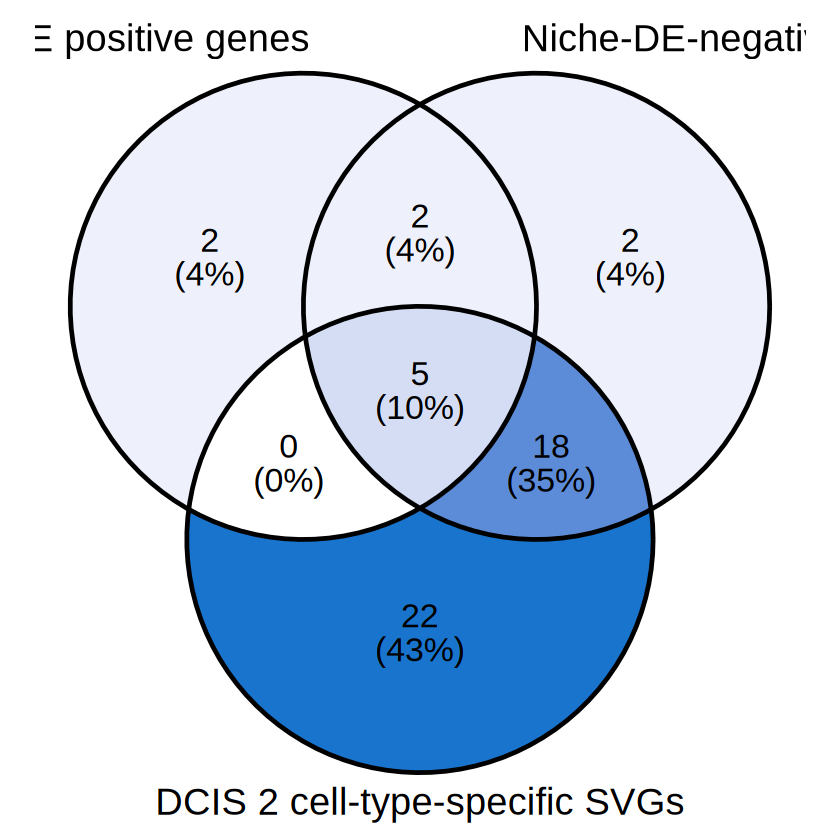

In [24]:
library(ggVennDiagram)
celltype <- 'DCIS 2'
svg_list <- list(niche_genes_T, niche_genes_F, rownames(sig_genes_list[[celltype]]))
name_list <- c(
    "Niche-DE positive genes", "Niche-DE-negative genes",
    paste0(celltype, " cell-type-specific SVGs")
)
p <- ggVennDiagram(svg_list, name_list, set_size = 8, label_size = 7, label_alpha = 0) +
    scale_fill_gradient(low = "white", high = "dodgerblue3") +
    # scale_fill_distiller(palette = "RdBu") +
    theme(
        text = element_text(size = 32),
        title = element_text(size = 24),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, seg_method, "niche_DE_genes_venn.pdf"),
    plot = p, width = 10, height = 6
)
p
